## Descriptive & Normal Distribution Analysis  
---
- Statistik deskriptif dasar
- Bentuk distribusi data (apakah normal atau tidak)
- Cara menangani data yang tidak berdistribusi normal

Dataset yang digunakan: **Seaborn – Tips Dataset**

---

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Tampilkan dataset tips
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 2. Eksplorasi Awal Dataset

Dataset ini berisi informasi mengenai tagihan di restoran, termasuk:
- total_bill: total tagihan
- tip: jumlah tip
- sex: jenis kelamin
- smoker: apakah perokok
- day: hari makan
- time: waktu (Lunch/Dinner)
- size: jumlah orang

Kita akan mulai dengan melihat ringkasan statistik dari data numeriknya.

In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 💡 Catatan:
- `mean` menunjukkan nilai rata-rata (central tendency)  
- `std` menunjukkan seberapa tersebar datanya (measure of spread)  
- `min`, `25%`, `50%`, `75%`, dan `max` membantu memahami bentuk distribusi  

Statistik ini membantu kita mengetahui kondisi awal data sebelum melakukan analisis lebih lanjut.

## 3. Visualisasi Distribusi Awal

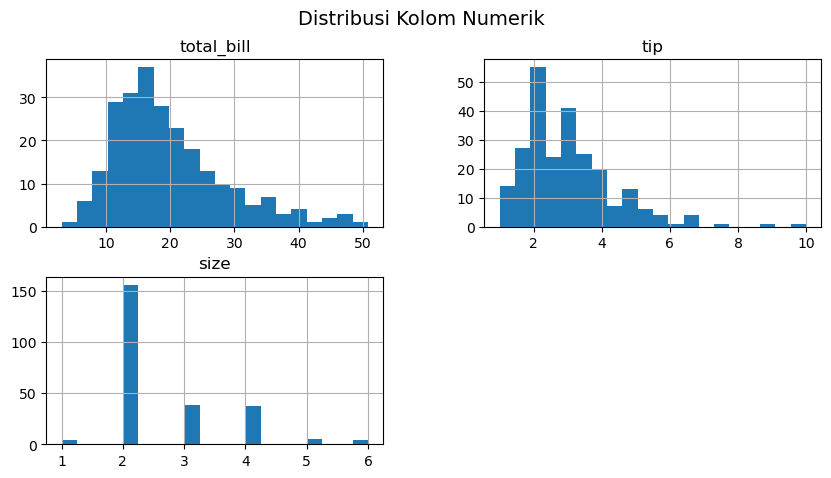

In [ ]:
num_cols = ['total_bill', 'tip', 'size']
df[num_cols].hist(bins=20, figsize=(10, 5))
plt.suptitle('Distribusi Kolom Numerik', fontsize=14)
plt.show()

## 4. Statistik Deskriptif (Central Tendency & Spread)

In [ ]:
for col in num_cols:
    print(f'📊 Kolom: {col}')
    print('Mean:', df[col].mean())
    print('Median:', df[col].median())
    print('Mode:', df[col].mode()[0])
    print('Variance:', df[col].var())
    print('Standard Deviation:', df[col].std())

📊 Kolom: total_bill
Mean: 19.78594262295082
Median: 17.795
Mode: 13.42
Variance: 79.25293861397826
Standard Deviation: 8.902411954856856
📊 Kolom: tip
Mean: 2.99827868852459
Median: 2.9
Mode: 2.0
Variance: 1.9144546380624725
Standard Deviation: 1.3836381890011826
📊 Kolom: size
Mean: 2.569672131147541
Median: 2.0
Mode: 2
Variance: 0.9045908385616921
Standard Deviation: 0.9510998047322332


## 5. Analisis Distribusi Normal pada Kolom `total_bill`

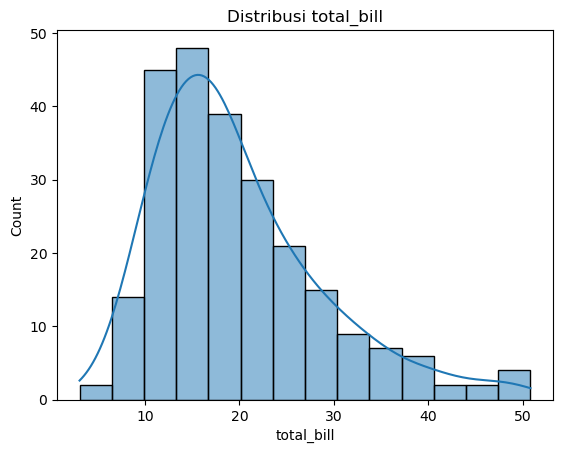

Shapiro-Wilk Test: Statistic = 0.9197188019752502 , p-value = 3.324553410344322e-10


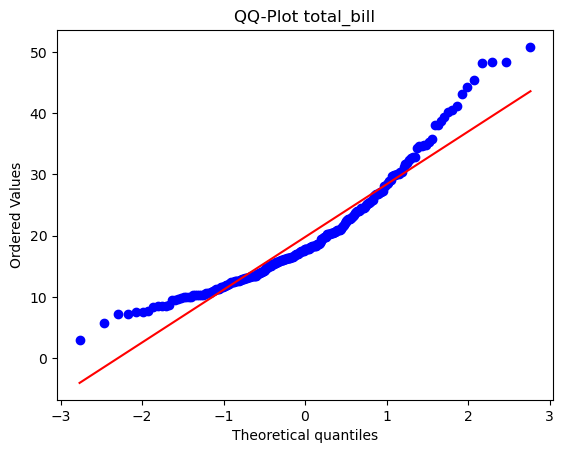

In [ ]:
sns.histplot(df['total_bill'], kde=True)
plt.title('Distribusi total_bill')
plt.show()

stat, p = stats.shapiro(df['total_bill'])
print('Shapiro-Wilk Test: Statistic =', stat, ', p-value =', p)

stats.probplot(df['total_bill'], dist='norm', plot=plt)
plt.title('QQ-Plot total_bill')
plt.show()

## 6. Menangani Data yang Tidak Normal

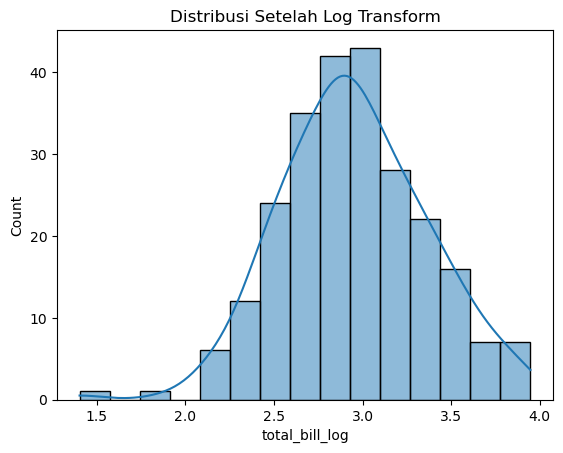

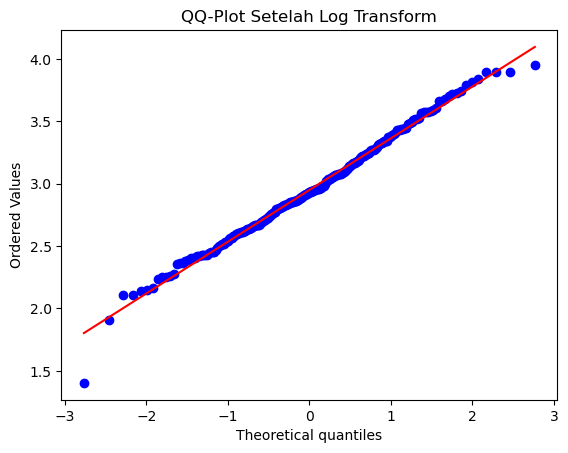

In [ ]:
df['total_bill_log'] = np.log1p(df['total_bill'])
sns.histplot(df['total_bill_log'], kde=True)
plt.title('Distribusi Setelah Log Transform')
plt.show()

stats.probplot(df['total_bill_log'], dist='norm', plot=plt)
plt.title('QQ-Plot Setelah Log Transform')
plt.show()

## 7. Perbandingan Sebelum dan Sesudah Transformasi

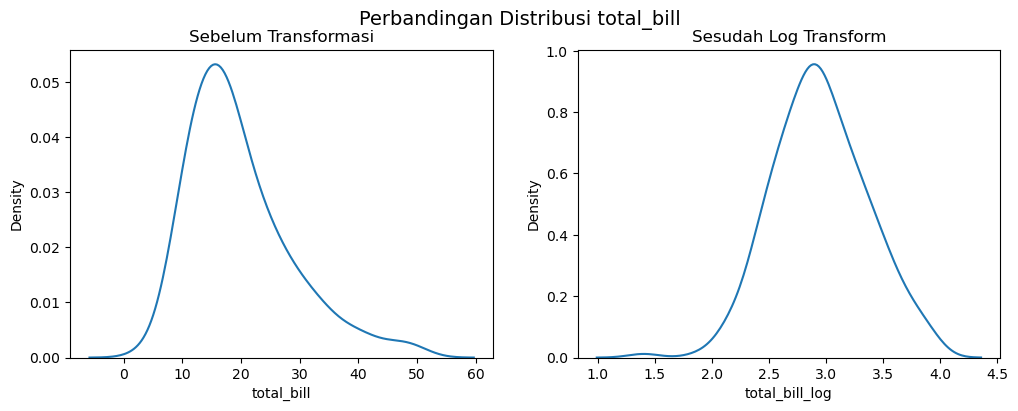

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(df['total_bill'], ax=axes[0])
axes[0].set_title('Sebelum Transformasi')
sns.kdeplot(df['total_bill_log'], ax=axes[1])
axes[1].set_title('Sesudah Log Transform')
plt.suptitle('Perbandingan Distribusi total_bill', fontsize=14)
plt.show()

/Users/arifagustyawan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


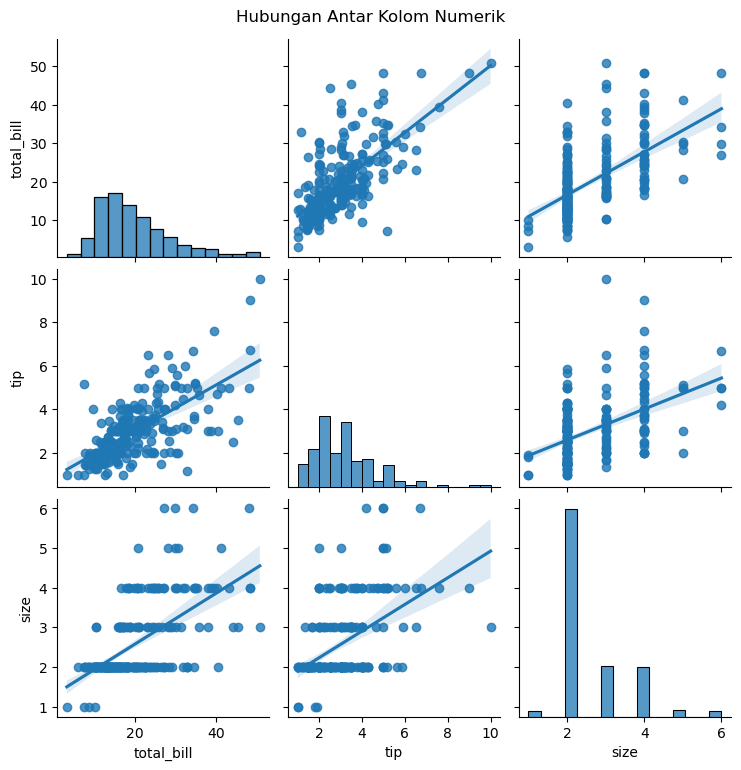

In [ ]:
sns.pairplot(df[num_cols], kind='reg')
plt.suptitle('Hubungan Antar Kolom Numerik', y=1.02)
plt.show()

## 9. Kesimpulan & Insight
- Statistik deskriptif membantu kita memahami kondisi awal data
- Analisis distribusi normal penting untuk metode statistik tertentu
- Jika data tidak normal, gunakan transformasi atau metode non-parametrik